# Project Overview

In this project, the objective is to predict whether the person has Diabetes or not based on various features such as;
age, hypertension status, heart_disease status, body mass index(bmi), HbA1c_level, and blood_glucose_level.

The data set that has used in this project has taken from the kaggle . "This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

Using machine learning for disease prediction (such as diabetes) showcases the potential of AI in healthcare. These tools can analyze patterns in large datasets, identifying trends that may not be obvious to human practitioners. This technology represents the future of preventive medicine.

Predicting diabetes provides an excellent opportunity to apply data science techniques, including data preprocessing, feature selection, machine learning modeling, and evaluation metrics. This project was successfully completed using tools like Python, machine learning libraries, and postgreSQL database, all while working on a project that addresses a real-world healthcare challenge.

Libraries Used for the Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

1. Data Loading and Inspection

In [2]:
path = "diabetes_prediction_dataset.csv"

df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

[]

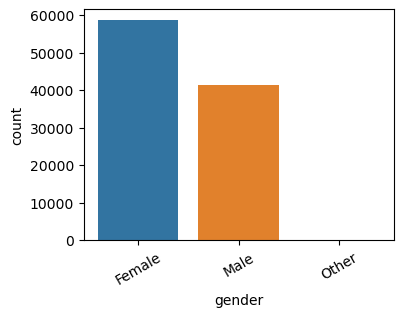

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(x= df['gender'])
plt.xticks(rotation=30)
plt.plot()

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [12]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

[]

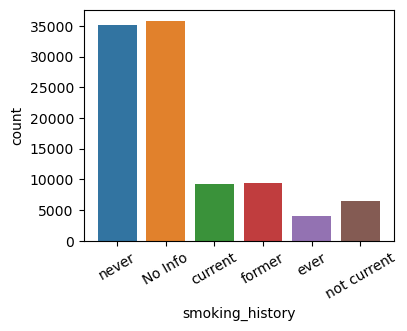

In [13]:
plt.figure(figsize=(4, 3))
sns.countplot(x= df['smoking_history'])
plt.xticks(rotation=30)
plt.plot()

2. Data Cleaning and Transformation

In [14]:
# Label encoding FOR CATEGORICAL Variables
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_smoking = LabelEncoder()
df['smoking_history'] = le_smoking.fit_transform(df['smoking_history'])

In [15]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,0,27.32,6.2,90,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,4,35.42,4.0,100,0


3. Loading data into a Database (PostgreSQL)

In [16]:
import psycopg2

hostname = 'localhost'
database = 'diabetes_data'
username = 'postgres'
pwd = '1234'
port_id = '5432'
conn = None
cur= None
try:
    conn = psycopg2.connect( host = hostname,
                        dbname = database,
                        user = username,
                        password = pwd,
                        port = port_id)
    
    cur = conn.cursor()
    
    create_script = ''' CREATE TABLE IF NOT EXISTS diabetes_data (
                            id SERIAL PRIMARY KEY,
                            gender INT,
                            age INT,
                            hypertension INT,
                            heart_disease INT,
                            smoking_history INT,
                            bmi FLOAT,
                            HbA1c_level FLOAT,
                            blood_glucose_level INT,
                            diabetes INT) '''
     
    cur.execute(create_script)
    
    
    # Insert data into the table
    for index, row in df.iterrows():
        cur.execute(""" INSERT INTO diabetes_data (gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) """, tuple(row))
    
    conn.commit()
    
    
except Exception as error:
    print (error)
    
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

4. Visualizations

In [17]:
# Extracting data from our database

from sqlalchemy import create_engine, MetaData, Table
import pandas as pd
import os

user = 'postgres'
password = '1234'
host = 'localhost'
port = '5432'
database = 'diabetes_data'

connection_str = f'postgresql://{user}:{password}@{host}:{port}/{database}'
     
# SQLAlchemy engine
engine = create_engine(connection_str)
sql= """select * from diabetes_data"""

# Reading query result into DataFrame
sql=df_n = pd.read_sql(sql,engine)

# print
df_n

,id,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes
0,1,0,80,0,1,4.0,25.19,6.6,140.0,0
1,2,0,54,0,0,0.0,27.32,6.6,80.0,0
2,3,1,28,0,0,4.0,27.32,5.7,158.0,0
3,4,0,36,0,0,1.0,23.45,5.0,155.0,0
4,5,1,76,1,1,1.0,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...,...
199995,199996,0,80,0,0,0.0,27.32,6.2,90.0,0
199996,199997,0,2,0,0,0.0,17.37,6.5,100.0,0
199997,199998,1,66,0,0,3.0,27.83,5.7,155.0,0
199998,199999,0,24,0,0,4.0,35.42,4.0,100.0,0


In [18]:
#Dropping the first(index) column

df_new = df_n.drop(df_n.columns[0], axis=1)
df_new


,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4.0,25.19,6.6,140.0,0
1,0,54,0,0,0.0,27.32,6.6,80.0,0
2,1,28,0,0,4.0,27.32,5.7,158.0,0
3,0,36,0,0,1.0,23.45,5.0,155.0,0
4,1,76,1,1,1.0,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
199995,0,80,0,0,0.0,27.32,6.2,90.0,0
199996,0,2,0,0,0.0,17.37,6.5,100.0,0
199997,1,66,0,0,3.0,27.83,5.7,155.0,0
199998,0,24,0,0,4.0,35.42,4.0,100.0,0


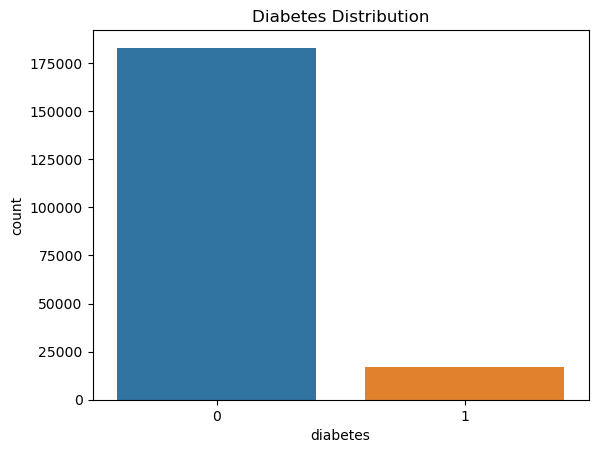

In [19]:
# Diabetes distribution
sns.countplot(x= df_new['diabetes'])
plt.title('Diabetes Distribution')
plt.show()

In [20]:
df_new['diabetes'].value_counts()

diabetes
0    183000
1     17000
Name: count, dtype: int64

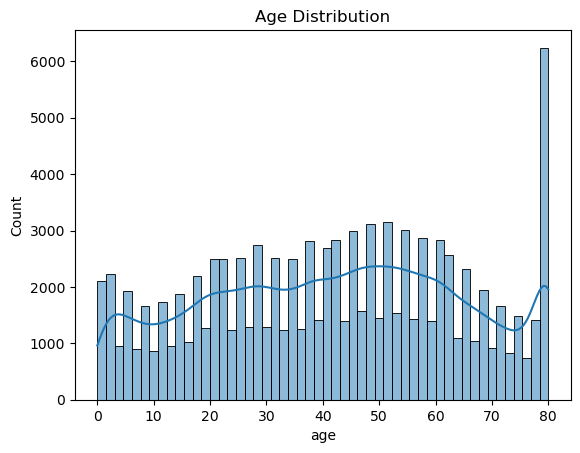

In [21]:
# Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

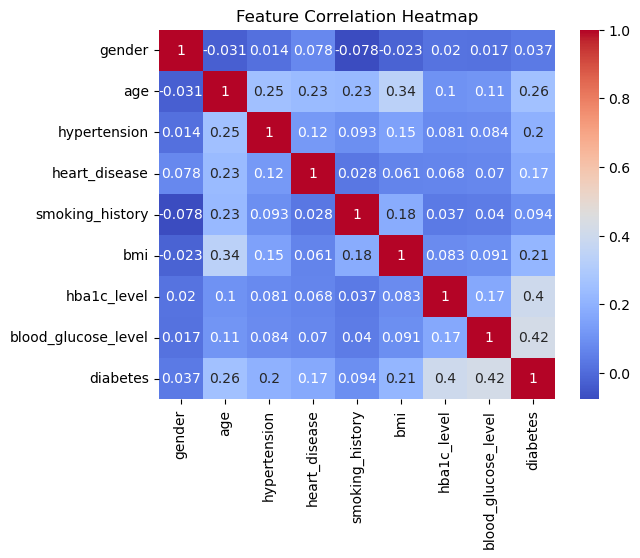

In [22]:
# Correlation heatmap
sns.heatmap(df_new.corr(), annot = True, cmap='coolwarm') 
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


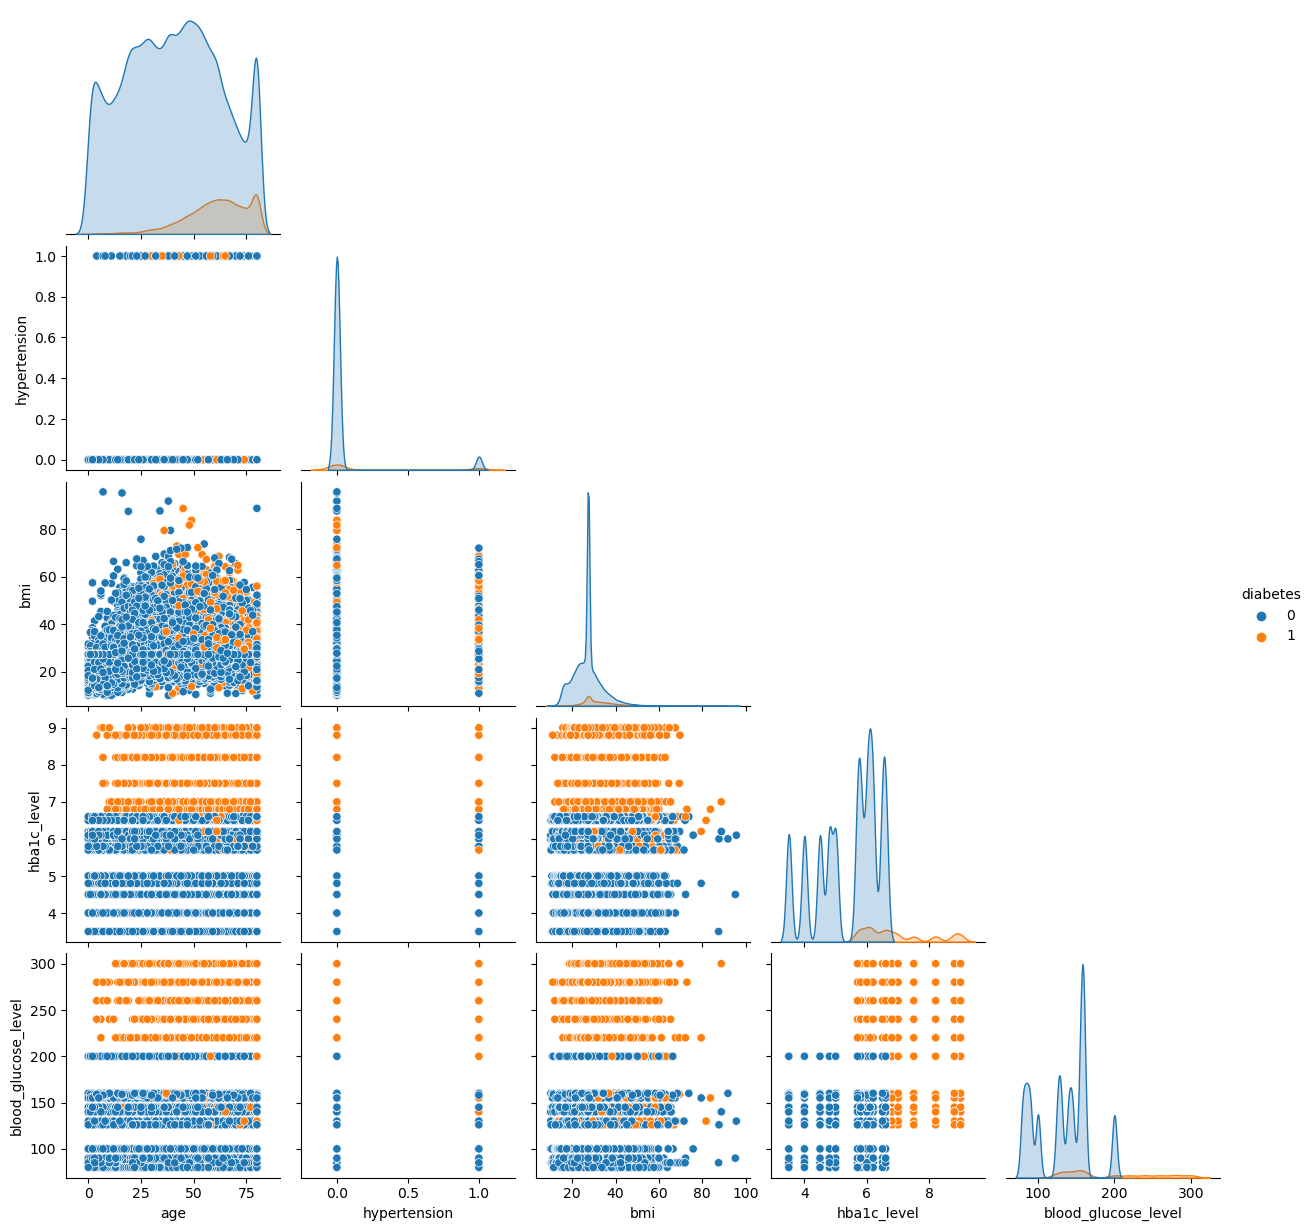

In [23]:
# Select numerical columns for pairplot
features = ['age', 'hypertension', 'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes']

# Create a pairplot with hue based on 'diabetes'
sns.pairplot(df_new[features], hue='diabetes', diag_kind='kde', corner=True)
plt.show()

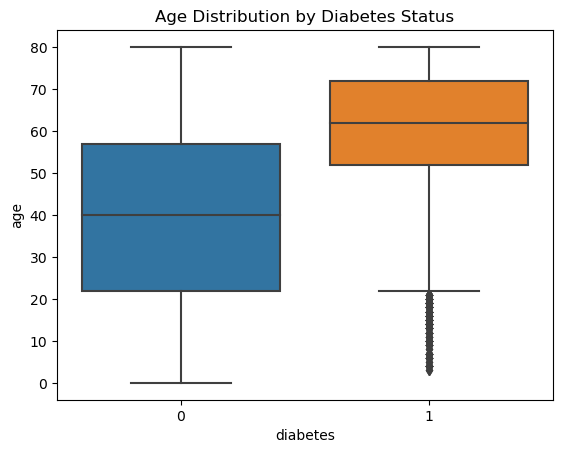

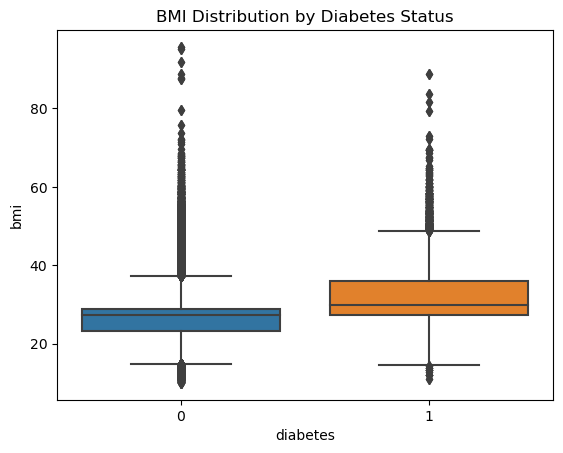

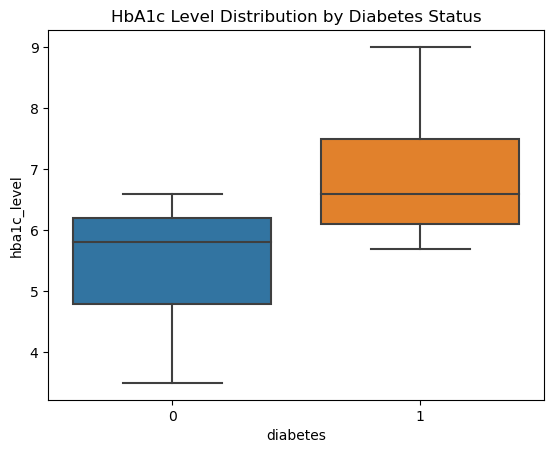

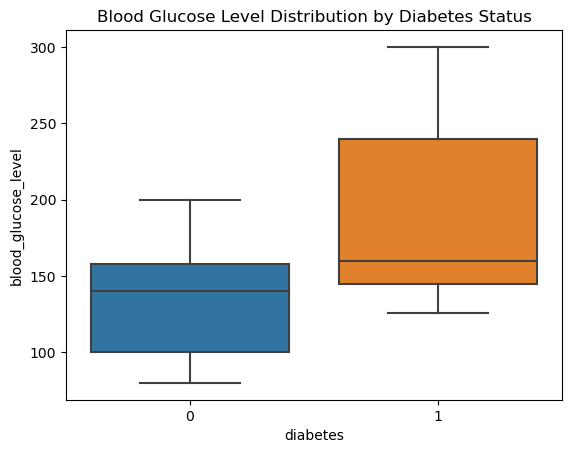

In [24]:
# Highlighting The major factors that causes diabetes using boxplot


sns.boxplot(x="diabetes", y="age", data=df_new)
plt.title("Age Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="bmi", data=df_new)
plt.title("BMI Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="hba1c_level", data=df_new)
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="blood_glucose_level", data=df_new)
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.show()

In [25]:
# Drop Gender and smoking history column
df_new.drop(columns=['gender', 'smoking_history'], inplace=True)
df_new.head()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140.0,0
1,54,0,0,27.32,6.6,80.0,0
2,28,0,0,27.32,5.7,158.0,0
3,36,0,0,23.45,5.0,155.0,0
4,76,1,1,20.14,4.8,155.0,0


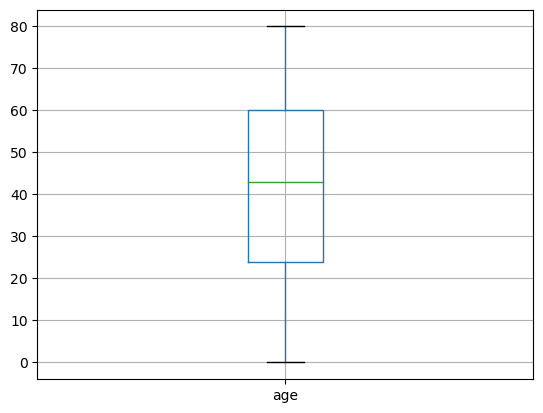

In [26]:
#Checking for outliers in age 
df_new.boxplot(column='age')

plt.show()

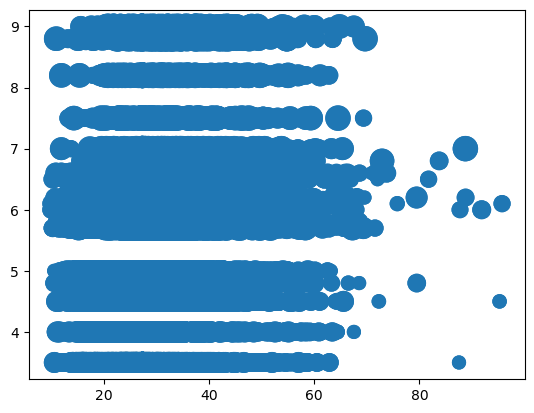

In [27]:
# Relationship between bmi,HbA1c_level and blood_glucose_level
plt.scatter(df_new['bmi'], df_new['hba1c_level'], df_new['blood_glucose_level'])

5. Model Building (Logistic Regression)

In [28]:
# Split data into features (X) and target (y)
X = df_new.drop(columns=['diabetes'])
y = df_new['diabetes']

In [29]:
# Apply SMOTE to oversample the minority class

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
# Check new class distribution
print(pd.Series(y_resampled).value_counts())

diabetes
0    183000
1    183000
Name: count, dtype: int64


In [31]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [32]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Initialize and train Logistic Regression model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = model.predict(X_test)

In [35]:
# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     45755
           1       0.87      0.63      0.73      4245

    accuracy                           0.96     50000
   macro avg       0.92      0.81      0.86     50000
weighted avg       0.96      0.96      0.96     50000



In [36]:
# Accuracy
accuracy_score(y_test, y_pred)

0.96102

<Axes: >

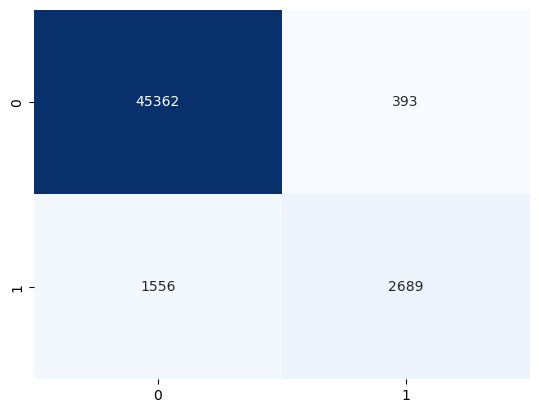

In [37]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [38]:
# Predict Diabetes status with Age(44), hypertension status (0), heart_disease status (0), 
#bmi (19.31), HbA1c_level (20.5), and blood_glucose_level(400)

print(model.predict(sc.transform([[44, 0, 0, 19.31, 20.5, 300]])))

# Predict Diabetes status with Age(80), hypertension status (0), heart_disease status (1), 
#bmi (13.31), HbA1c_level (6.0), and blood_glucose_level(200)

print(model.predict(sc.transform([[80, 0, 1, 13.31, 6.0, 200]])))

[1]
[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
# Predict Diabetes status with patients record
age = input('Enter your age: ')
hypertension_status = input ('Hypertension Status (Negative(0)/Positive(1): ') 
heart_disease_status = input ('Heart Disease Status (Negative(0)/Positive(1): ')
bmi = input('Enter your Body Mass Index: ')
HbA1c_level = input('Enter your HbA1c level: ')
blood_glucose_level = input('Enter your Blood Glucose Level: ')

patient_data = [age, hypertension_status, heart_disease_status, bmi, HbA1c_level, blood_glucose_level]

print('Status =', model.predict(sc.transform([patient_data])))

Enter your age: 50
Hypertension Status (Negative(0)/Positive(1): 1
Heart Disease Status (Negative(0)/Positive(1): 0
Enter your Body Mass Index: 67
Enter your HbA1c level: 6.5
Enter your Blood Glucose Level: 6.5
Status = [0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
